<a href="https://colab.research.google.com/github/team-epoch/EPOCH_4th_TASK/blob/main/4th_TASK/DevelopTeam/Pilot/week1/4%EA%B8%B0_%EC%9D%B4%EC%A7%80%EC%9C%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Pilot Project 주제
> **주제: 신용카드 소비 패턴으로 고객 군집화**

* 데이터 소스 : Kaggle – “Credit Card Dataset for Clustering”

## 1️⃣ TASK 1. 데이터 출처 설명 / 데이터 불러오기

* 출처 : Kaggle - [Credit Card Dataset for Clustering](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/drive/MyDrive/EPOCH/EPOCH 4th/Build-Up/CC GENERAL.csv')
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


### ❔ 컬럼 정보
* `CUST_ID` : 신용카드 소지자를 식별하는 고유 ID (범주형 변수)
* `BALANCE` : 구매를 하기 위해 계정에 남아 있는 잔액
* `BALANCE_FREQUENCY` : 잔액이 얼마나 자주 갱신되는지 나타내는 값 (0~1 사이 점수, 1 = 매우 자주 갱신, 0 = 거의 갱신 안 됨)
* `PURCHASES` : 총 구매 금액
* `ONEOFF_PURCHASES` : 한 번에 이루어진 최대 단일 구매 금액
* `INSTALLMENTS_PURCHASES` : 할부로 결제된 구매 금액
* `CASH_ADVANCE` : 고객이 신용카드로 선불 현금을 받은 금액
* `PURCHASES_FREQUENCY` : 구매가 얼마나 자주 발생하는지 (0~1, 1 = 자주 구매, 0 = 거의 구매 없음)
* `ONEOFFPURCHASESFREQUENCY` : 한 번에 큰 금액 구매가 얼마나 자주 일어나는지 (0~1)
* `PURCHASESINSTALLMENTSFREQUENCY` : 할부 구매가 얼마나 자주 일어나는지 (0~1)
* `CASHADVANCEFREQUENCY` : 현금서비스가 얼마나 자주 이용되는지 (0~1)
* `CASHADVANCETRX` : 현금서비스 거래 횟수
* `PURCHASES_TRX` : 구매 거래 횟수
* `CREDIT_LIMIT` : 고객의 신용카드 한도액
* `PAYMENTS` : 고객이 실제로 납부한 결제 금액
* `MINIMUM_PAYMENTS` : 고객이 납부한 최소 결제 금액
* `PRCFULLPAYMENT` : 고객이 전액 결제를 한 비율
* `TENURE` : 고객이 해당 신용카드를 사용한 기간 (개월 단위)


## 2️⃣ TASK 2. 기초 통계 확인

### 기초 통계 확인


In [6]:
round(data.describe(), 2) # 소수점 둘째자리까지 통계 정보 확인

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8949.00,8950.00,8637.00,8950.00,8950.00
mean,1564.47,0.88,1003.20,592.44,411.07,978.87,0.49,0.20,0.36,0.14,3.25,14.71,4494.45,1733.14,864.21,0.15,11.52
std,2081.53,0.24,2136.63,1659.89,904.34,2097.16,0.40,0.30,0.40,0.20,6.82,24.86,3638.82,2895.06,2372.45,0.29,1.34
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.02,0.00,6.00
25%,128.28,0.89,39.64,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1600.00,383.28,169.12,0.00,12.00
50%,873.39,1.00,361.28,38.00,89.00,0.00,0.50,0.08,0.17,0.00,0.00,7.00,3000.00,856.90,312.34,0.00,12.00
75%,2054.14,1.00,1110.13,577.40,468.64,1113.82,0.92,0.30,0.75,0.22,4.00,17.00,6500.00,1901.13,825.49,0.14,12.00
max,19043.14,1.00,49039.57,40761.25,22500.00,47137.21,1.00,1.00,1.00,1.50,123.00,358.00,30000.00,50721.48,76406.21,1.00,12.00


*데이터 간 스케일 차이가 크니, 모델링 시 스케일링도 고려해보자*

### 데이터 shape 확인

In [13]:
data.shape

(8950, 18)

*8950 행, 18 열*

### data.info()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

*`CUST_ID` 제외 모두 숫자형 데이터*

### 결측치 확인

In [10]:
data.isnull().sum() / len(data) * 100

,0
CUST_ID,0.000000
BALANCE,0.000000
BALANCE_FREQUENCY,0.000000
PURCHASES,0.000000
ONEOFF_PURCHASES,0.000000
INSTALLMENTS_PURCHASES,0.000000
CASH_ADVANCE,0.000000
PURCHASES_FREQUENCY,0.000000
ONEOFF_PURCHASES_FREQUENCY,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000


*결측치는 아주 적다*

## 3️⃣ TASK 3. 분석 목적/인사이트 설명

> **금융 데이터를 기반으로 소비자를 군집화한 뒤, 소비자 행동/리스크를 설명**

>**도출해낼 수 있는 인사이트**

* 고객군 정의

* 맞춤형 상품/마케팅 전략 수립

* 신용 리스크 관리

* 고객 유지/이탈 방지

* 사회적 소비 트렌드 변화 파악

*인사이트는 추후.. 구체화 예정*

## 4️⃣ TASK 4. EDA

### 상관관계 plot

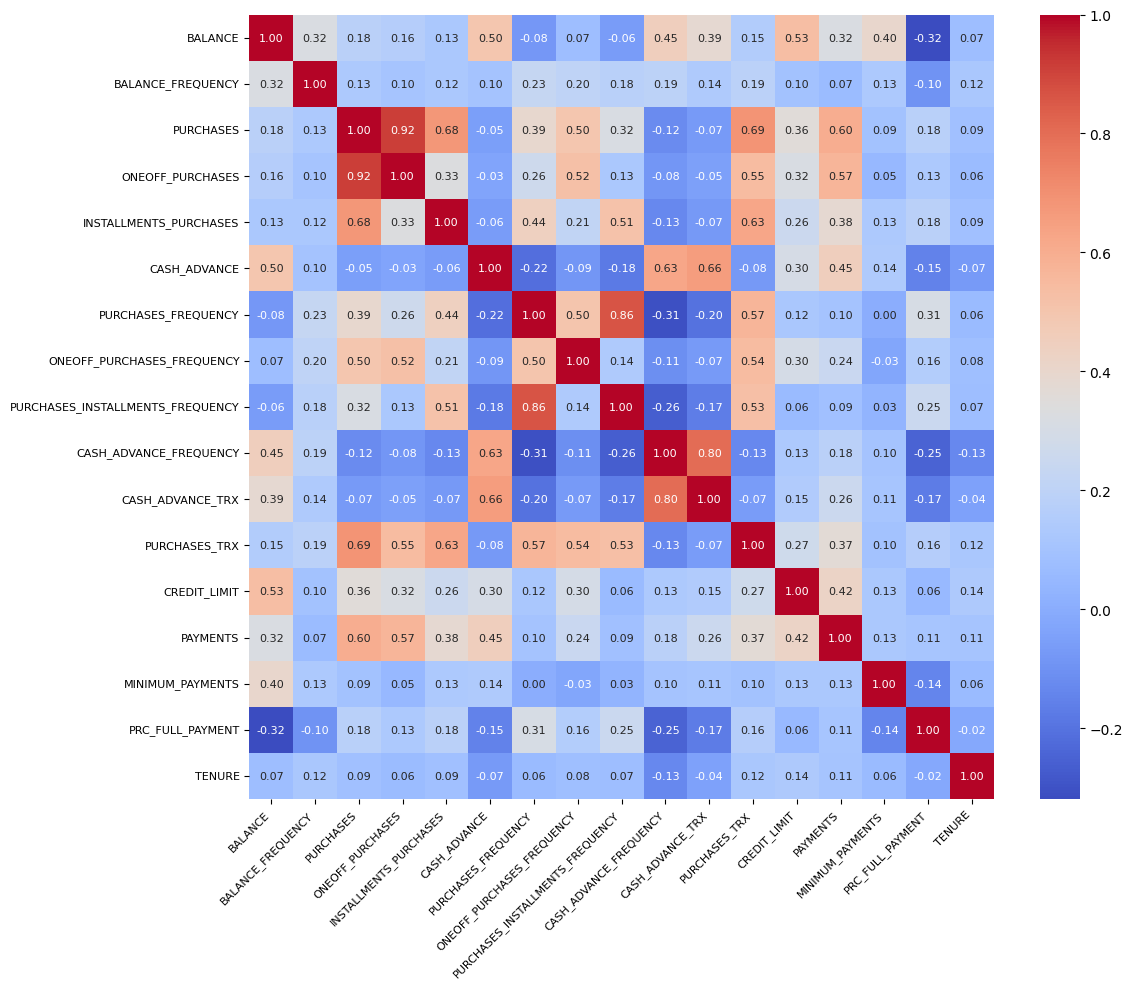

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))  # 전체 크기 줄이거나 키우기
corr = data.corr(numeric_only=True)

sns.heatmap(
    corr,
    annot=True,      # 숫자 표시
    fmt=".2f",       # 소수점 자리수
    cmap="coolwarm", # 색상맵
    annot_kws={"size": 8}  # 숫자 글자 크기 조정
)

# x, y축 라벨 각도 조정
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

1️⃣
> `PURCHASES` : 총 구매 금액
>
> `ONEOFF_PURCHASES` : 한 번에 이루어진 최대 단일 구매 금액
>
> ✅ 0.92


<br>

2️⃣
> `PURCHASES_FREQUENCY` : 구매가 얼마나 자주 발생하는지 (0~1, 1 = 자주 구매, 0 = 거의 구매 없음)
>
> `PURCHASESINSTALLMENTSFREQUENCY` : 할부 구매가 얼마나 자주 일어나는지 (0~1)
>
> ✅ 0.86


🤔 상관관계도 높고, 비슷한 내용을 담고 있는 컬럼같은데 하나만 택일해도 되지 않을까?

<br>

3️⃣
> `CASHADVANCEFREQUENCY` : 현금서비스가 얼마나 자주 이용되는지 (0~1)
>
> `CASHADVANCETRX` : 현금서비스 거래 횟수
>
> ✅ 0.80

🤔 흠 .. 할부 구매 ∈ 구매?

<br>

4️⃣
> `PURCHASES_TRX` : 구매 거래 횟수
>
> `PURCHASES` : 총 구매 금액
>
>✅ 0.69

<br>

5️⃣
> `CASH_ADVANCE` : 고객이 신용카드로 선불 현금을 받은 금액
>
> `CASHADVANCETRX` : 현금서비스 거래 횟수
>
>✅ 0.66

<br>

6️⃣
> `CASH_ADVANCE` : 고객이 신용카드로 선불 현금을 받은 금액
>
> `CASHADVANCEFREQUENCY` : 현금서비스가 얼마나 자주 이용되는지 (0~1)
>
>✅ 0.63

<br>

7️⃣
> `PURCHASES` : 총 구매 금액
>
> `PAYMENTS` : 고객이 실제로 납부한 결제 금액
>
> ✅ 0.60

### 데이터 분포 확인(히스토그램)

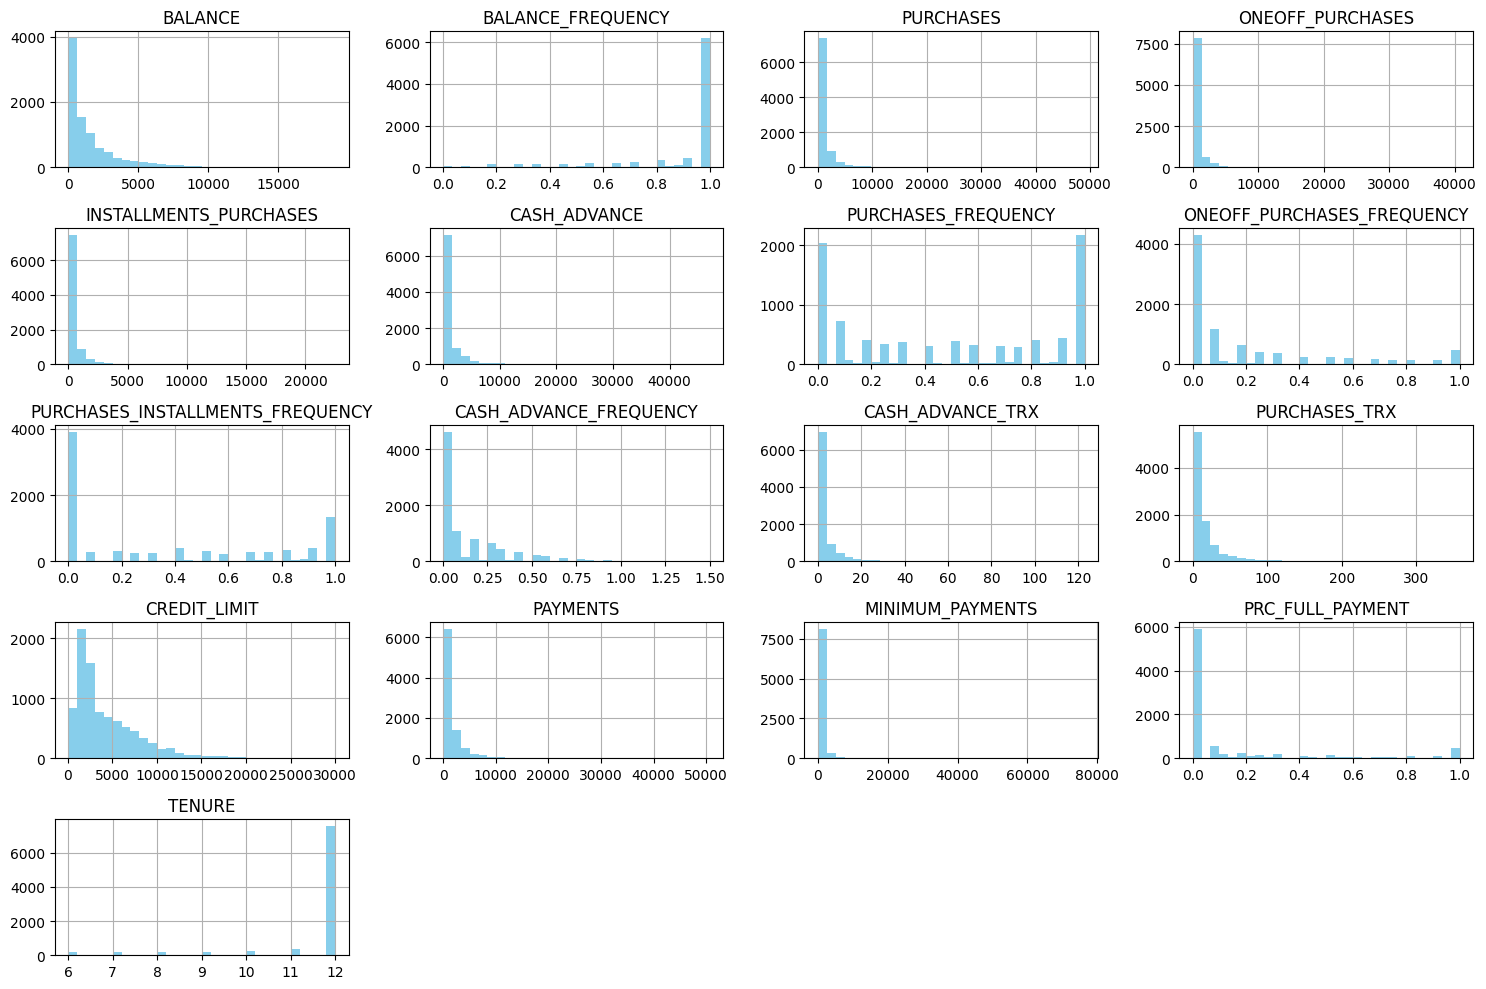

In [20]:
data.hist(bins=30, figsize=(15, 10), color='skyblue')
plt.title('Credit Card Dataset Histogram')
plt.tight_layout()
plt.show()

*거의 모든 변수가 한 쪽으로 치우친 분포를 보임*

### Boxplot 확인

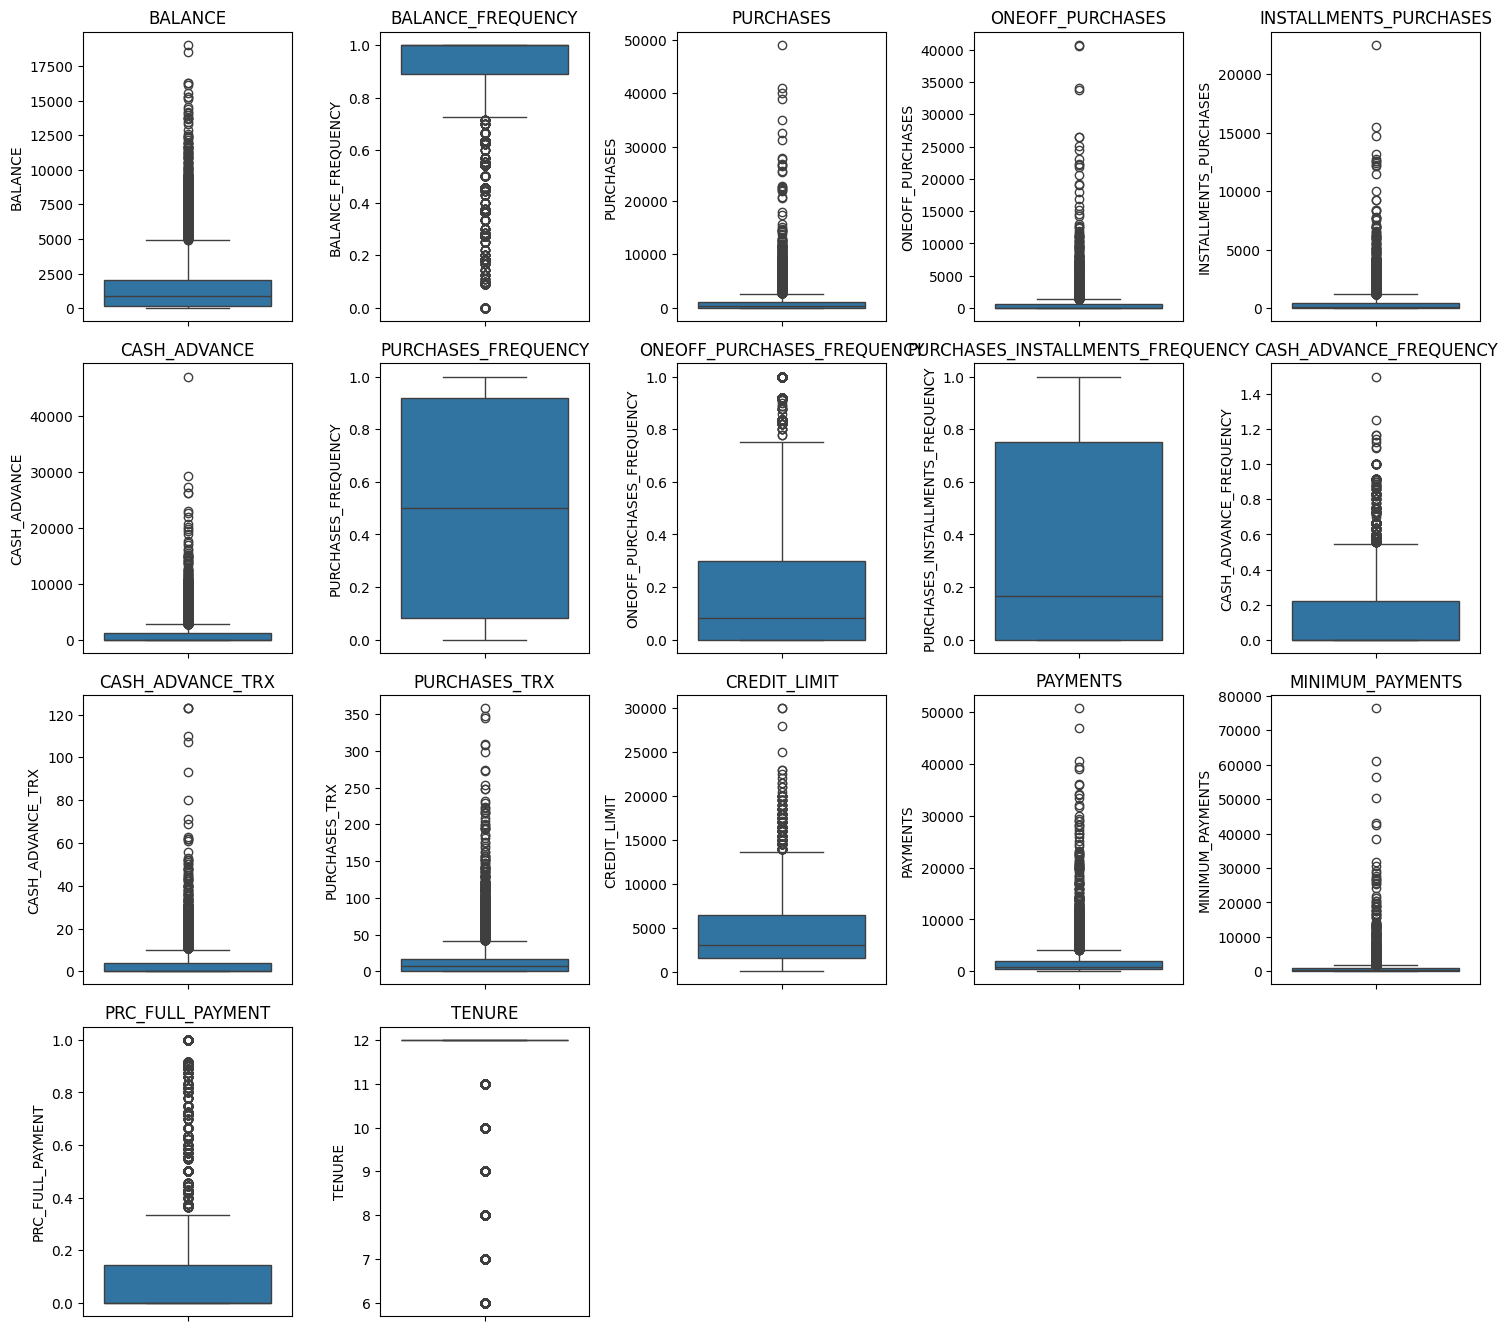

In [26]:
num_cols = data.select_dtypes(include='number').columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 5, i)  # 5열 배치
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### 이상치 비율 확인

In [31]:
def outlier_ratio(df):
    ratios = {}
    num_cols = df.select_dtypes(include="number").columns

    for col in num_cols:
        Q1 = df[col].quantile(0.25) # 25%
        Q3 = df[col].quantile(0.75) # 75%
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR # 하한
        upper = Q3 + 1.5 * IQR # 상한

        outliers = ((df[col] < lower) | (df[col] > upper)).sum() # 하한 또는 상한 이상치 개수
        ratio = outliers / len(df) * 100 # 비율 계산
        ratios[col] = round(ratio, 2)

    return pd.DataFrame.from_dict(ratios, orient='index', columns=['Outlier_Ratio(%)']).sort_values(by='Outlier_Ratio(%)', ascending=False)

outlier_table = outlier_ratio(data)
print(outlier_table)

                                  Outlier_Ratio(%)
BALANCE_FREQUENCY                            16.68
PRC_FULL_PAYMENT                             16.47
TENURE                                       15.26
CASH_ADVANCE                                 11.51
ONEOFF_PURCHASES                             11.32
INSTALLMENTS_PURCHASES                        9.69
MINIMUM_PAYMENTS                              9.40
PAYMENTS                                      9.03
PURCHASES                                     9.03
CASH_ADVANCE_TRX                              8.98
ONEOFF_PURCHASES_FREQUENCY                    8.74
PURCHASES_TRX                                 8.56
BALANCE                                       7.77
CASH_ADVANCE_FREQUENCY                        5.87
CREDIT_LIMIT                                  2.77
PURCHASES_INSTALLMENTS_FREQUENCY              0.00
PURCHASES_FREQUENCY                           0.00


***🤔 왜 이렇게 이상치가 많아 보일까?***

1️⃣ 데이터 분포가 치우쳐 있음 (Skewed Distribution)

> `BALANCE`, `CASH_ADVANCE`, `PURCHASES` 같은 금액 변수는 대부분 고객이 낮은 금액대에 몰려 있고, 일부 극단적으로 높은 고객이 있어서 박스플롯에서는 점이 잔뜩 생김

2️⃣ 샘플이 많은 경우
> 데이터가 수천~만 단위 이상이면 극단치로 분류되는 값이 많아 보이는 건 자연스러움

3️⃣ 신용카드 고객 데이터의 특성
> 소비 패턴이 사람마다 워낙 다르기 때문에, 평균적인 값에서 벗어난 고객이 많음
>
> → 통계적으로는 이상치지만 실제론 중요한 고객일 수 있음.

<br>

💡 `CREDIT_LIMIT(신용한도)`, `PAYMENTS(결제액)`, `PURCHASES(구매액)` 같은 변수는 원래 값의 편차가 큰 게 정상 !

> 박스플롯은 단순히 **통계적 기준(IQR)**으로 극단치를 표시할 뿐,
> 실제 비즈니스적으로는 “프리미엄 고객”, “헤비 유저”처럼 중요한 집단일 수도 있음

*➡️ 이상치가 많기도 하고, 데이터 특성상 이상치 처리(제거)가 위험할 수 있을 것 같음*